In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
df = pd.read_csv('~/Desktop/googleflu 1.csv')
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Salt Lake City, UT","Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI"
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,261,1066,948,NaN,1035,NaN,668,NaN,622,452
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,249,1249,963,NaN,1135,NaN,787,NaN,626,449
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,295,1289,970,NaN,1170,NaN,994,NaN,661,437
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,292,1308,1011,NaN,1342,NaN,999,NaN,649,487
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,328,1426,1009,NaN,1354,NaN,1297,NaN,657,499


In [3]:
df['ds']=pd.to_datetime(df['Date'])
df.head()

,Date,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,"Arlington, VA","Norfolk, VA","Reston, VA","Richmond, VA","Bellevue, WA","Seattle, WA","Spokane, WA","Madison, WI","Milwaukee, WI",ds
0,2003-09-28,902,477,NaN,606,NaN,929,233,223,NaN,...,1066,948,NaN,1035,NaN,668,NaN,622,452,2003-09-28
1,2003-10-05,952,501,NaN,663,NaN,849,251,243,NaN,...,1249,963,NaN,1135,NaN,787,NaN,626,449,2003-10-05
2,2003-10-12,1092,492,NaN,700,NaN,1032,283,261,NaN,...,1289,970,NaN,1170,NaN,994,NaN,661,437,2003-10-12
3,2003-10-19,1209,533,NaN,819,NaN,1084,310,268,NaN,...,1308,1011,NaN,1342,NaN,999,NaN,649,487,2003-10-19
4,2003-10-26,1249,594,NaN,959,NaN,989,344,334,NaN,...,1426,1009,NaN,1354,NaN,1297,NaN,657,499,2003-10-26


In [4]:
df_flu = df[['ds', 'United States']]
df_flu.head()

,ds,United States
0,2003-09-28,902
1,2003-10-05,952
2,2003-10-12,1092
3,2003-10-19,1209
4,2003-10-26,1249


In [5]:
df2 = pd.read_csv('~/Desktop/States_ILI.csv')
df2.head()

,week.code,Week,AK,AL,AR,AZ,DE,GA,ID,KS,...,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV
0,200940,10/4/2009,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,...,6.851755,6.481481,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303
1,200941,10/11/2009,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,...,6.308213,10.096154,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555
2,200942,10/18/2009,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,...,3.897699,8.770161,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631
3,200943,10/25/2009,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,...,4.525917,5.100830,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013
4,200944,11/1/2009,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,...,3.540097,2.837838,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838


In [6]:
df2['ds']=pd.to_datetime(df2['Week'])
df2.head()

,week.code,Week,AK,AL,AR,AZ,DE,GA,ID,KS,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,ds
0,200940,10/4/2009,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,...,6.481481,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303,2009-10-04
1,200941,10/11/2009,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,...,10.096154,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555,2009-10-11
2,200942,10/18/2009,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,...,8.770161,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631,2009-10-18
3,200943,10/25/2009,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,...,5.100830,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013,2009-10-25
4,200944,11/1/2009,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,...,2.837838,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838,2009-11-01


In [7]:
df2['US'] = df2['AK']+df2['AL']+df2['AR']+df2['AZ']+df2['DE']+df2['GA']+df2['ID']+df2['KS']+df2['KY']+df2['LA']+df2['MA']+df2['MD']+df2['ME']+df2['MI']+df2['MN']+df2['NC']+df2['ND']+df2['NE']+df2['NH']+df2['NJ']+df2['NM']+df2['NV']+df2['NY']+df2['OH']+df2['OR']+df2['PA']+df2['RI']+df2['SC']+df2['SD']+df2['TN']+df2['TX']+df2['UT']+df2['VA']+df2['VT']+df2['WA']+df2['WI']+df2['WV']                                                                                                                   
df2.head()

,week.code,Week,AK,AL,AR,AZ,DE,GA,ID,KS,...,TN,TX,UT,VA,VT,WA,WI,WV,ds,US
0,200940,10/4/2009,6.681128,11.714032,11.690647,5.412864,4.177719,5.756567,11.336176,7.996503,...,3.687230,13.297408,6.131683,6.088217,2.616738,5.833498,4.663368,3.880303,2009-10-04,221.572984
1,200941,10/11/2009,6.766595,9.333333,15.008186,6.083715,6.565015,5.051700,11.308922,10.732660,...,4.196797,12.804213,12.697060,8.912076,3.415271,8.497337,5.526189,6.785555,2009-10-11,271.136826
2,200942,10/18/2009,7.611438,7.273329,12.163600,3.839384,12.443643,5.902007,9.019844,11.286385,...,3.905351,11.067298,13.828930,14.540389,7.232704,8.210526,8.418070,12.495631,2009-10-18,294.532493
3,200943,10/25/2009,7.210031,7.836504,9.673560,3.230019,9.708042,5.642044,7.393967,8.196823,...,4.456052,9.377208,12.274096,14.730188,12.428198,6.835002,7.566347,14.498013,2009-10-25,282.747261
4,200944,11/1/2009,3.989242,7.175214,7.686567,3.267177,6.373463,5.468195,4.770992,6.575291,...,3.255092,6.429295,9.984384,10.112995,12.583833,5.282293,7.112512,10.748838,2009-11-01,242.148545


In [8]:
df_ILI = df2[['ds', 'US']]
df_ILI.head()

,ds,US
0,2009-10-04,221.572984
1,2009-10-11,271.136826
2,2009-10-18,294.532493
3,2009-10-25,282.747261
4,2009-11-01,242.148545


In [9]:
df_sum=pd.merge(df_flu,df_ILI,on='ds',how='inner')
df_sum.head()

,ds,United States,US
0,2009-10-04,5424,221.572984
1,2009-10-11,6037,271.136826
2,2009-10-18,7112,294.532493
3,2009-10-25,6533,282.747261
4,2009-11-01,5722,242.148545


In [10]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    
    return np.array(data), np.array(labels)

In [11]:
TRAIN_SPLIT = 300
tf.random.set_seed(13)

In [12]:
df_ILI

,ds,US
0,2009-10-04,221.572984
1,2009-10-11,271.136826
2,2009-10-18,294.532493
3,2009-10-25,282.747261
4,2009-11-01,242.148545
...,...,...
393,2017-04-16,NaN
394,2017-04-23,NaN
395,2017-04-30,NaN
396,2017-05-07,NaN


In [13]:
df_ILI.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
uni_data = df_ILI['US']
uni_data.index = df_ILI['ds']
uni_data.head()

ds
2009-10-04    221.572984
2009-10-11    271.136826
2009-10-18    294.532493
2009-10-25    282.747261
2009-11-01    242.148545
Name: US, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10f18fe10>],
      dtype=object)

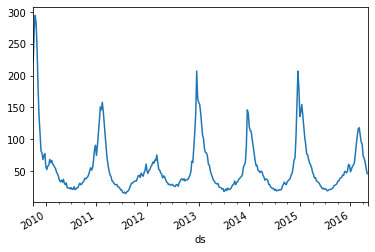

In [15]:
uni_data.plot(subplots=True)

In [16]:
uni_data = uni_data.values

In [17]:
uni_data

array([221.57298442, 271.13682639, 294.53249347, 282.74726071,
       242.14854529, 181.72741725, 135.68653219, 110.23688418,
        81.81270977,  78.15605072,  68.04267058,  74.15779029,
        77.25439305,  56.34961901,  52.3015506 ,  57.86829841,
        59.26279002,  68.2113005 ,  63.16223778,  66.92098639,
        61.09530385,  59.25656572,  55.84223455,  53.6213886 ,
        47.99311374,  45.63036161,  41.18671257,  34.99988489,
        33.25054408,  35.58321361,  32.37188856,  36.83158954,
        30.82983889,  28.35201725,  31.19211139,  23.60670257,
        23.30936856,  23.40345626,  21.85243363,  23.96452852,
        21.18534802,  21.42177456,  25.25117482,  20.73600989,
        21.87102899,  23.62070947,  23.79763421,  27.94018442,
        30.87780492,  28.35279929,  29.78117093,  32.24352664,
        34.2972455 ,  38.55073689,  37.7090418 ,  39.17778481,
        40.85815612,  44.3646341 ,  49.79616992,  55.0931783 ,
        51.4519918 ,  54.85961055,  67.55913899,  83.48

In [18]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [19]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [20]:
univariate_past_history = 20
univariate_future_target = 0

In [21]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [22]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[ 3.60097154]
 [ 4.68428284]
 [ 5.19563929]
 [ 4.93805079]
 [ 4.05068925]
 [ 2.73007148]
 [ 1.72376105]
 [ 1.16751097]
 [ 0.546247  ]
 [ 0.46632381]
 [ 0.24527681]
 [ 0.37893429]
 [ 0.44661638]
 [-0.0102969 ]
 [-0.09877508]
 [ 0.0228967 ]
 [ 0.05337595]
 [ 0.24896253]
 [ 0.13860574]
 [ 0.22076028]]

 Target temperature to predict
0.09342899496993214


In [23]:
def create_time_steps(length):
    return list(range(-length, 0))

In [24]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
              plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
              plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

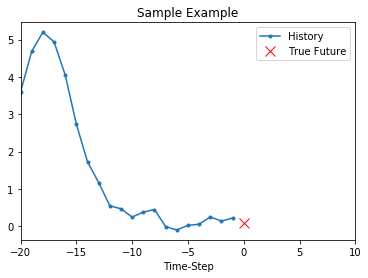

In [25]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [26]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

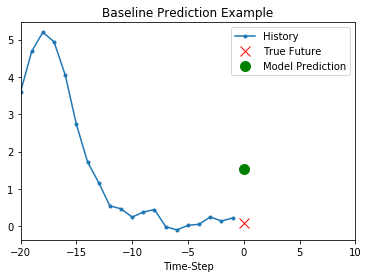

In [27]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

In [28]:
BATCH_SIZE = 100
BUFFER_SIZE = 100

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [29]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [30]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(25, 1)


In [31]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 4s 20ms/step - loss: 0.3730 - val_loss: 0.2817
Epoch 2/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1603 - val_loss: 0.2095
Epoch 3/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1142 - val_loss: 0.1743
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: 0.1002 - val_loss: 0.1539
Epoch 5/10
200/200 [==============================] - 2s 11ms/step - loss: 0.0938 - val_loss: 0.1499
Epoch 6/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0905 - val_loss: 0.1466
Epoch 7/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0881 - val_loss: 0.1423
Epoch 8/10
200/200 [==============================] - 2s 10ms/step - loss: 0.0862 - val_loss: 0.1392
Epoch 9/10
200/200 [==============================] - 2s 9ms/step - loss: 0.0837 - val_loss: 0.1383
Epoch 10/10
200/200 [=============================

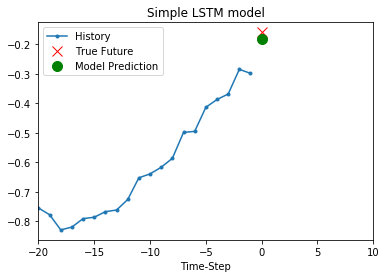

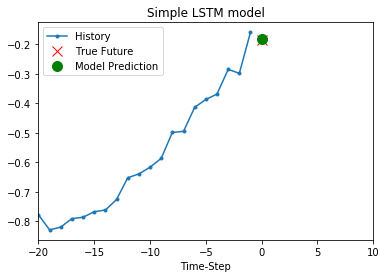

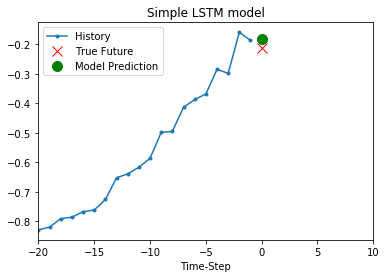

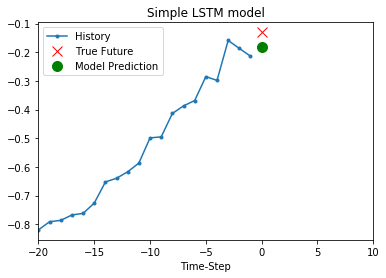

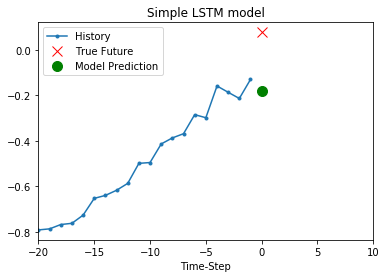

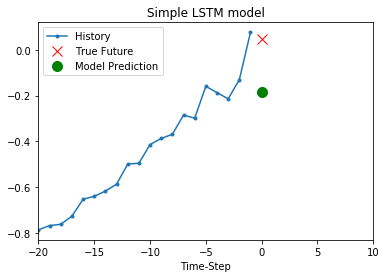

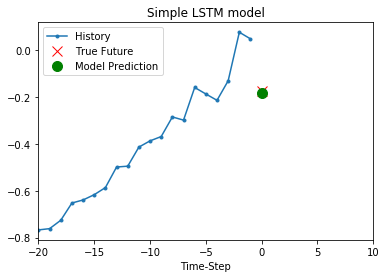

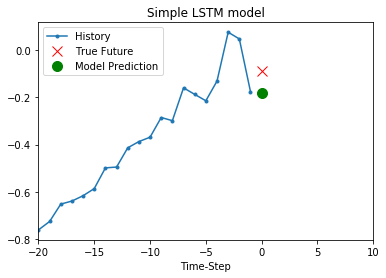

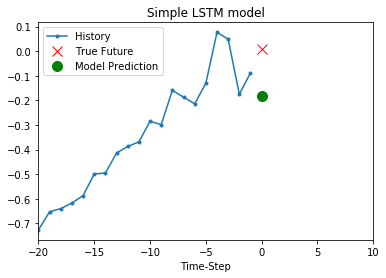

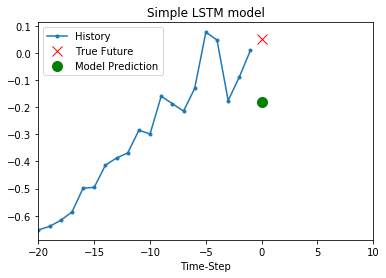

In [35]:
i = 0
for x, y in val_univariate.take(10):
    
    plot = show_plot([x[i].numpy(), y[i].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()
    i+=1

In [41]:
def mse(predict, ground_truth):

    metric = []
    for i in range(len(predict)):
        metric.append((predict[i][0] - ground_truth[i])**2)
    
    return np.mean(np.sum(metric))


def mae(predict, ground_truth):

    metric = []
    for i in range(len(predict)):
        metric.append(np.abs(predict[i][0] - ground_truth[i]))
    
    return np.mean(np.sum(metric))

print("The mean squared error of the model is {}".format(mse(simple_lstm_model.predict(x), y.numpy())))
print("The mean absolute error of the model is {}".format(mae(simple_lstm_model.predict(x), y.numpy())))

The mean squared error of the model is 0.8362548558674301
The mean absolute error of the model is 3.5406685676332708


In [36]:
features_considered = ['US','United States']

In [38]:
features = df_sum[features_considered]
features.index = df_sum['ds']
features.head()

,US,United States
ds,,
2009-10-04,221.572984,5424
2009-10-11,271.136826,6037
2009-10-18,294.532493,7112
2009-10-25,282.747261,6533
2009-11-01,242.148545,5722


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1463e4c10>,
      dtype=object)

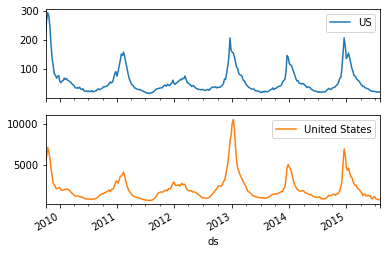

In [39]:
features.plot(subplots=True)

In [40]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)